<a href="https://colab.research.google.com/github/kiseonjeong/computer-vision/blob/2-study-the-super-resolution-algorithm/super%20resolution/cifar10_edsr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load image data
ishape = 128
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Reduce the dataset
train_image = train_images[0:10000]
test_image = test_images[0:1000]

x_train = np.array([img for img in train_image])
x_test = np.array([img for img in test_image])

y_train = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC) for img in train_image])
y_test = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC) for img in test_image])


In [4]:
# Get RGB mean values
flatten_train = x_train.reshape(x_train.shape[0], -1, x_train.shape[3])
RGB_MEAN = np.sum(np.sum(flatten_train, axis=0), axis=0) / (flatten_train.shape[0] * flatten_train.shape[1])

In [5]:
def normalize(x, rgb_mean=RGB_MEAN):
    return (x - rgb_mean) / 127.5

def denormalize(x, rgb_mean=RGB_MEAN):
    return x * 127.5 + rgb_mean

def pixel_shuffle(scale):
    return lambda x: tf.nn.depth_to_space(x, scale)

def upsample(x, scale, filters):
    def _upsample(x, factor, **kwargs):
        x = layers.Conv2D(filters=filters * (factor ** 2), kernel_size=3, padding='same', **kwargs)(x)
        return layers.Lambda(pixel_shuffle(scale=factor))(x)

    if scale == 2:
        x = _upsample(x, 2, name='conv2d_1_scale_2')
    elif scale == 3:
        x = _upsample(x, 3, name='conv2d_1_scale_3')
    elif scale == 4:
        x = _upsample(x, 2, name='conv2d_1_scale_2')
        x = _upsample(x, 2, name='conv2d_2_scale_2')

    return x

scaling = None

In [6]:
# Set input layer
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Lambda(normalize)(inputs)

x = b = b_in = layers.Conv2D(filters=64, kernel_size=3, padding='same')(x)

# Set 1st res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

# Set 2nd res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

# Set 3rd res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

# Set 4th res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

# Set 5th res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

# Set 6th res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

# Set 7th res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

# Set 8th res. block layer
b = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(b_in)
b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
if scaling:
    b = layers.Lambda(lambda t: t * scaling)(b)
b = b_in = layers.Add()([b_in, b])

b = layers.Conv2D(filters=64, kernel_size=3, padding='same')(b)
x = layers.Add()([x, b])

# Set up sampling layer (128x128)
x = upsample(x, scale=4, filters=64)
x = layers.Conv2D(filters=3, kernel_size=3, padding='same')(x)

# Set output layer
outputs = layers.Lambda(denormalize)(x)

# Set a EDSR model
model = keras.Model(inputs, outputs, name='EDSR')
model.summary()

Model: "EDSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 lambda (Lambda)                (None, 32, 32, 3)    0           ['img[0][0]']                    
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 64)   1792        ['lambda[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 32, 32, 64)   36928       ['conv2d[0][0]']                 
                                                                                               

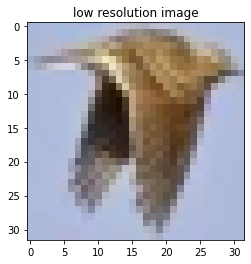

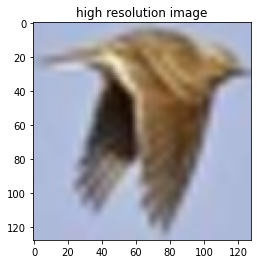

In [7]:
# Load image data
ishape = 128
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

# Reduce the dataset
train_image = train_images[0:10000]
test_image = test_images[0:1000]

x_train = np.array([img for img in train_image])
x_test = np.array([img for img in test_image])

y_train = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC) for img in train_image])
y_test = np.array([cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC) for img in test_image])

# Show an example image
example_idx = 123
plt.figure('LR')
plt.imshow(x_train[example_idx])
plt.title('low resolution image')
plt.figure('HR')
plt.imshow(y_train[example_idx])
plt.title('high resolution image')
plt.show()

In [8]:
# Train the model
def PSNR(y_true, y_pred):
    return tf.image.psnr(y_true, y_pred, max_val=255.0)

def SSIM(y_true, y_pred):
    return tf.image.ssim(y_true, y_pred, max_val=255.0)

model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='mse', metrics=[PSNR, SSIM, 'accuracy'])

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)

print('Test loss:', test_scores[0])
print('Test mse:', test_scores[1])

# Save entire model to a HDF5 file
model.save('EDSR.h5')

Epoch 1/10
125/125 [==============================] - 73s 406ms/step - loss: 551.4937 - PSNR: 23.2767 - SSIM: 0.5773 - accuracy: 0.6443 - val_loss: 136.1069 - val_PSNR: 27.2387 - val_SSIM: 0.7684 - val_accuracy: 0.7408
Epoch 2/10
125/125 [==============================] - 49s 396ms/step - loss: 93.9639 - PSNR: 29.0099 - SSIM: 0.8233 - accuracy: 0.7691 - val_loss: 64.0495 - val_PSNR: 30.5637 - val_SSIM: 0.8670 - val_accuracy: 0.7915
Epoch 3/10
125/125 [==============================] - 48s 388ms/step - loss: 52.0856 - PSNR: 31.5664 - SSIM: 0.8896 - accuracy: 0.8085 - val_loss: 40.6661 - val_PSNR: 32.5735 - val_SSIM: 0.9105 - val_accuracy: 0.8219
Epoch 4/10
125/125 [==============================] - 49s 389ms/step - loss: 35.3368 - PSNR: 33.2665 - SSIM: 0.9224 - accuracy: 0.8327 - val_loss: 29.1886 - val_PSNR: 34.0329 - val_SSIM: 0.9345 - val_accuracy: 0.8419
Epoch 5/10
125/125 [==============================] - 48s 388ms/step - loss: 26.2231 - PSNR: 34.5706 - SSIM: 0.9414 - accuracy: 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


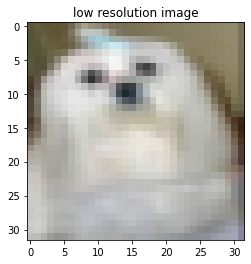

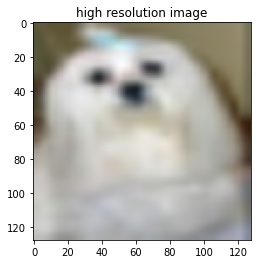

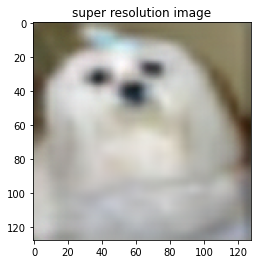

In [9]:
# Set real test image
img = train_images[20001]
lr = np.array(img)
hr = np.array(cv.resize(img, (ishape, ishape), interpolation=cv.INTER_CUBIC))
test_input = np.reshape(lr, (1, 32, 32, 3))

# Predict a result
sr = model.predict(test_input)
plt.figure('LR')
plt.title('low resolution image')
plt.imshow(lr)
plt.figure('HR')
plt.title('high resolution image')
plt.imshow(hr)
plt.figure('SR')
plt.title('super resolution image')
plt.imshow(sr[0] / 255.0)
plt.show()